In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('US-SRM.csv', index_col=0, parse_dates=True, skipinitialspace=True)

df.head()

,DW_SW,DW_LW,Air_Temp,SPFH,Pa,Precip,LAI,WS_u,WS_v,Albedo,...,IGBP,DOY,LE,DW_SW_FLux,RH,PM,PMDL,NDVI,EVI,PTJPL
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,147.650010,279.83334,285.98334,0.003213,86663.336,0.0,0.2,0.341667,0.741667,0.166544,...,10,1,7.967936,157.182479,0.329273,5.807176,7.922225,0.243300,0.141000,6.814877
2018-01-02,144.295840,263.80002,285.61252,0.002879,86658.336,0.0,0.2,0.408333,-0.395833,0.166158,...,10,2,7.384004,150.836604,0.302433,4.926195,7.377690,0.241869,0.140025,3.986042
2018-01-03,126.341675,257.36667,285.33334,0.002367,86479.586,0.0,0.2,-2.737500,1.112500,0.165772,...,10,3,8.244889,106.234188,0.252733,5.908845,7.597770,0.240437,0.139050,0.865131
2018-01-04,108.816670,330.22916,287.10000,0.003462,86456.664,0.0,0.2,-0.570833,0.079167,0.165386,...,10,4,6.598689,134.867833,0.328934,5.379279,6.808356,0.239006,0.138075,9.220085
2018-01-05,153.116670,256.51248,286.25833,0.003858,86783.750,0.0,0.2,-0.370833,0.500000,0.165000,...,10,5,7.326796,161.673208,0.388883,4.816340,7.922124,0.237575,0.137100,3.621144


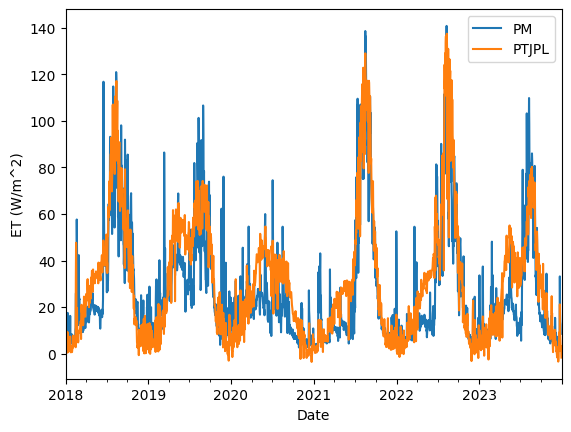

In [6]:
df['PM'].plot()
df['PTJPL'].plot()
plt.xlabel('Date')
plt.ylabel( 'ET (W/m^2)')
plt.legend()

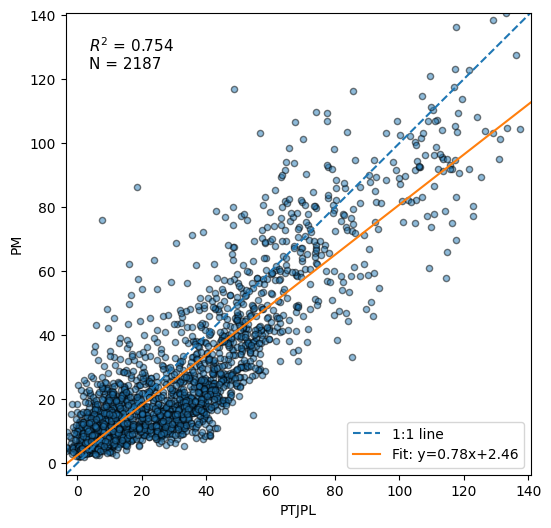

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Clean data (remove NaN/inf rows for the two columns)
dfc = df[['PTJPL', 'PM']].replace([np.inf, -np.inf], np.nan).dropna()

x = dfc['PTJPL'].to_numpy()
y = dfc['PM'].to_numpy()

# Scatter
ax = dfc.plot.scatter(
    x='PTJPL', y='PM',
    alpha=0.5, edgecolor='k', figsize=(6, 6)
)

# 1:1 line
lo = np.min([x.min(), y.min()])
hi = np.max([x.max(), y.max()])
lims = [lo, hi]
ax.plot(lims, lims, '--', label='1:1 line')

# Set square bounds so 1:1 line is meaningful
ax.set_xlim(lims)
ax.set_ylim(lims)

# Linear fit y = m x + b and R² (based on that fit)
m, b = np.polyfit(x, y, 1)
ax.plot(lims, m*np.array(lims) + b, label=f'Fit: y={m:.2f}x+{b:.2f}')

r2 = r2_score(y, m*x + b)

# Labels + R² annotation
ax.set_xlabel('PTJPL')
ax.set_ylabel('PM')
ax.text(0.05, 0.95, f"$R^2$ = {r2:.3f}\nN = {len(x)}",
        transform=ax.transAxes, va='top', fontsize=11)

ax.legend()
plt.show()


In [7]:
yearly_max = df[['PM', 'PTJPL']].groupby(df.index.year).max()
yearly_max.head()

,PM,PTJPL
Date,,
2018,120.942451,117.110812
2019,106.606218,74.194505
2020,74.480842,54.623020
2021,138.594150,128.998365
2022,140.783683,137.428435


<Axes: xlabel='Date'>

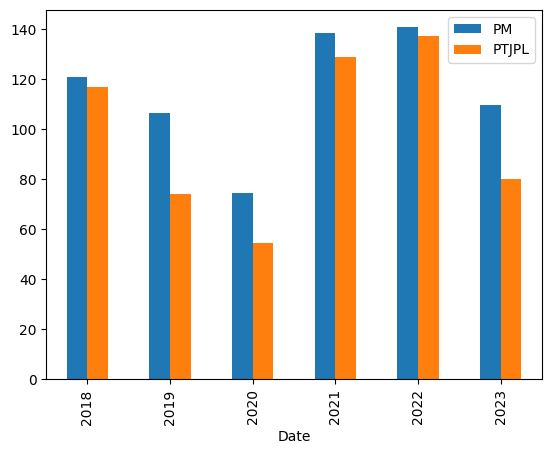

In [8]:
yearly_max.plot.bar()